In [ ]:
#!pip install python-louvain

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
#import community as community_louvain
from community import community_louvain
import os
import matplotlib.cm as cm
import random
import numpy as np

# Phase 1: Introduction and Model Generation

## Task 1.1: Network Generation

In [ ]:
G1 = nx.barabasi_albert_graph(100, 1)
G2 = nx.barabasi_albert_graph(100, 5)
G3 = nx.barabasi_albert_graph(100, 20)
G4 = nx.barabasi_albert_graph(100, 70)
G5 = nx.barabasi_albert_graph(100, 99)


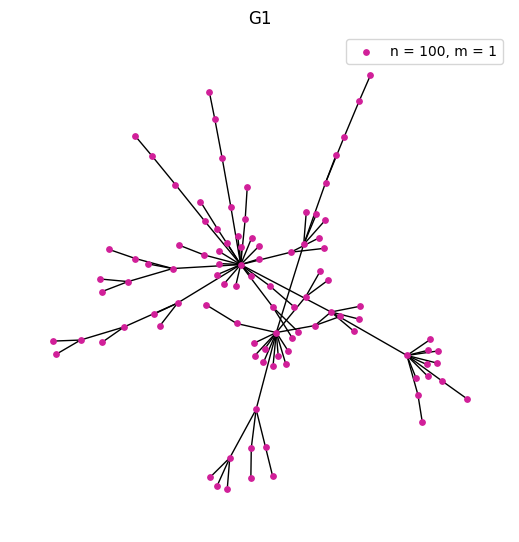

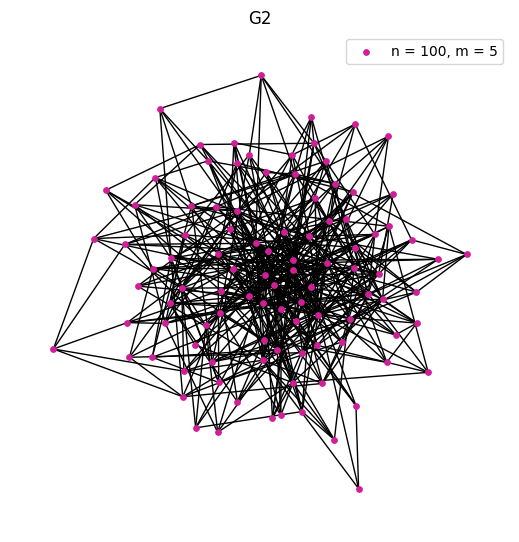

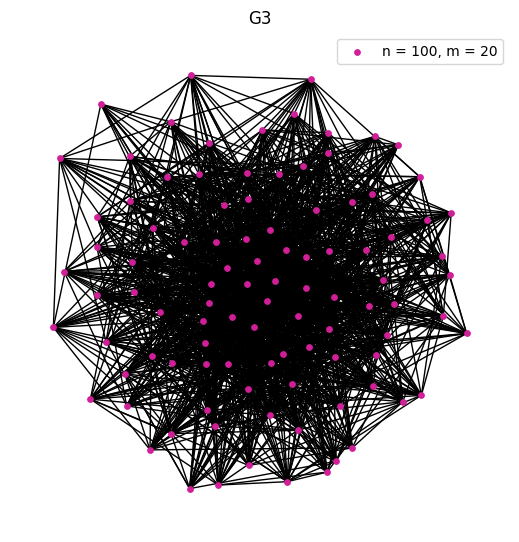

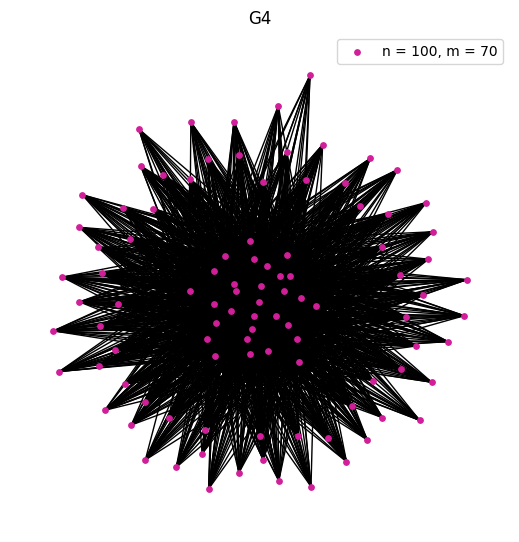

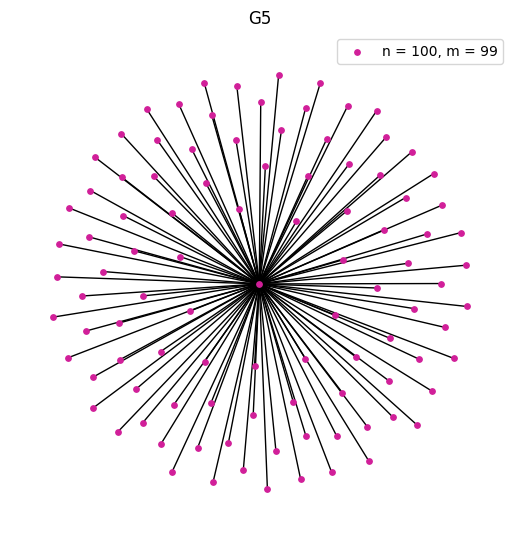

In [ ]:
graphs = [G1, G2, G3, G4, G5]
m_values = [1, 5, 20, 70, 99]

for i, (G, m) in enumerate(zip(graphs, m_values), start=1):
    plt.figure(figsize=(5, 5))
    nx.draw(
        G,
        node_color='#D11F99',
        node_size=15
    )
    plt.title(f"G{i}")
    plt.legend([f"n = 100, m = {m}"])
    plt.show()


# Phase 2: Structural Analysis

## Task 2.1: Basic Metrics

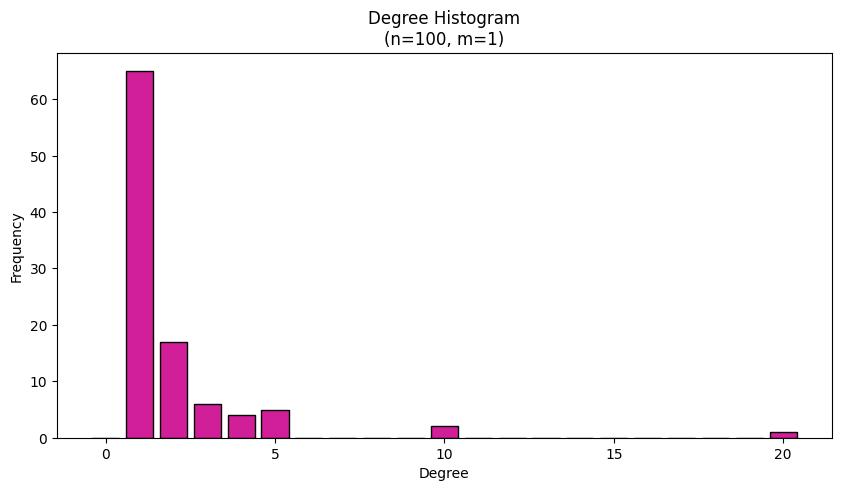

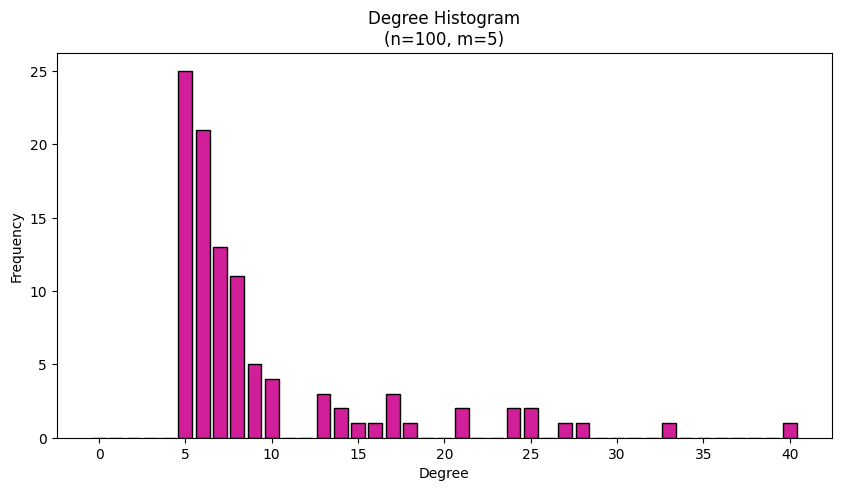

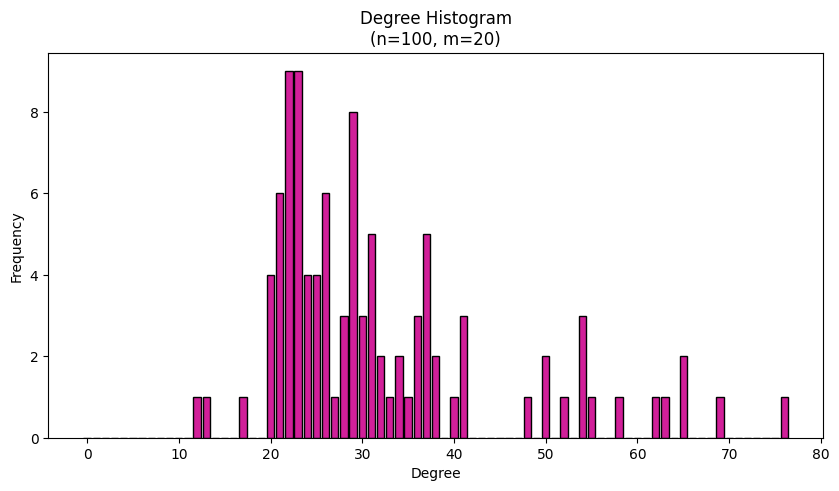

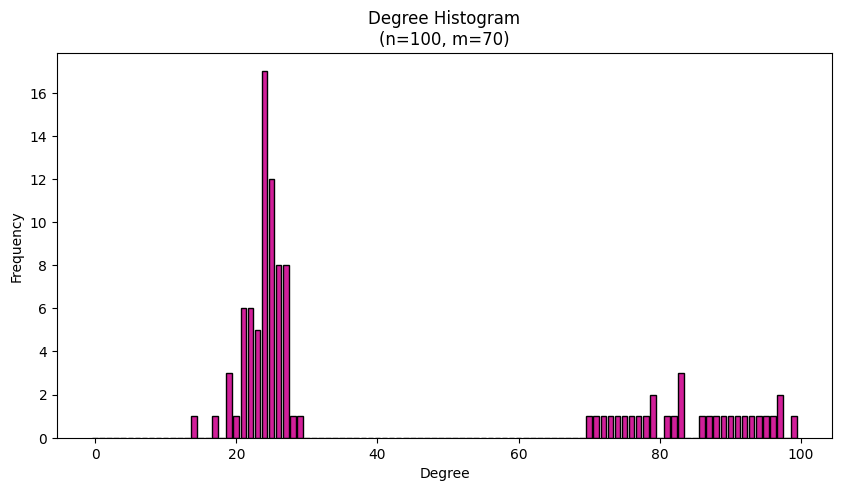

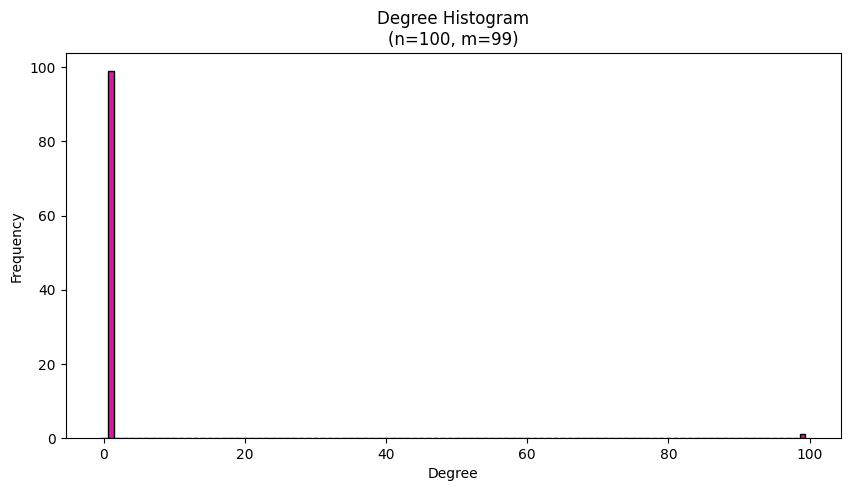

In [ ]:
# Degree Histograms
m_values = [1, 5, 20, 70, 99]


for i, m in enumerate(m_values, start=1):
    G = nx.barabasi_albert_graph(100, m)

    plt.figure(figsize=(10, 5))
    degree_hist = nx.degree_histogram(G)

    plt.bar(range(len(degree_hist)), degree_hist, color='#D11F99', edgecolor='black')

    plt.title(f"Degree Histogram\n(n=100, m={m})")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
graphs = [G1, G2, G3, G4, G5]
graph_names = ['G1', 'G2', 'G3', 'G4', 'G5']

In [ ]:
# Average Path Length

for graph, name in zip(graphs, graph_names):
    avg_path_length = nx.average_shortest_path_length(graph)
    print(f"Average Path Length in Graph {name}: {avg_path_length}")

Average Path Length in Graph G1: 4.932121212121212
Average Path Length in Graph G2: 2.2365656565656566
Average Path Length in Graph G3: 1.676969696969697
Average Path Length in Graph G4: 1.5757575757575757
Average Path Length in Graph G5: 1.98


In [ ]:
# Global and average clustering coefficients,
# global = procenat punih trojki od svih u grafu, average = isto ali za 1 cvor

for graph, name in zip(graphs, graph_names):
    global_clustering = nx.transitivity(graph)
    average_clustering = nx.average_clustering(graph)
    print(f"Global clustering coefficient of graph {name}: {global_clustering}")
    print(f"Average clustering coefficient of graph {name}: {average_clustering}")
    print()

Global clustering coefficient of graph G1: 0
Average clustering coefficient of graph G1: 0.0

Global clustering coefficient of graph G2: 0.1791487957769713
Average clustering coefficient of graph G2: 0.20660212739897552

Global clustering coefficient of graph G3: 0.40870098039215685
Average clustering coefficient of graph G3: 0.4377327767816989

Global clustering coefficient of graph G4: 0.5501052380763274
Average clustering coefficient of graph G4: 0.8382914074350246

Global clustering coefficient of graph G5: 0
Average clustering coefficient of graph G5: 0.0



### Centrality metrics:

In [ ]:
# Closeness Centrality

for graph, name in zip(graphs, graph_names):
    closeness = nx.closeness_centrality(graph)
    print(f"Graph {name}:", sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5])


Graph G1: [(2, 0.33221476510067116), (3, 0.33221476510067116), (1, 0.3), (0, 0.27049180327868855), (26, 0.2647058823529412)]
Graph G2: [(0, 0.6111111111111112), (6, 0.5963855421686747), (9, 0.5892857142857143), (1, 0.5857988165680473), (15, 0.5561797752808989)]
Graph G3: [(21, 0.792), (23, 0.7857142857142857), (22, 0.7734375), (27, 0.7615384615384615), (0, 0.7443609022556391)]
Graph G4: [(0, 1.0), (71, 0.99), (72, 0.9801980198019802), (73, 0.9705882352941176), (74, 0.9519230769230769)]
Graph G5: [(0, 1.0), (1, 0.5025380710659898), (2, 0.5025380710659898), (3, 0.5025380710659898), (4, 0.5025380710659898)]


In [ ]:
# Betweenness Centrality

for graph, name in zip(graphs, graph_names):
    betweenness = nx.betweenness_centrality(graph)
    print(f"Graph {name}:", sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5])

Graph G1: [(3, 0.7328385899814471), (2, 0.6182230467944754), (0, 0.5147392290249433), (1, 0.4555761698618841), (26, 0.21047206761492473)]
Graph G2: [(0, 0.12215741573343113), (9, 0.10585428415673233), (6, 0.09618618861286497), (1, 0.09479650712270171), (15, 0.05380570458081704)]
Graph G3: [(21, 0.03671222893008856), (23, 0.03510926739637498), (22, 0.033249588234978616), (0, 0.0305644456849351), (27, 0.030305522448110547)]
Graph G4: [(0, 0.030513448649179008), (71, 0.02974832864890292), (72, 0.028681618533866807), (73, 0.027844965222558537), (74, 0.025992008788201636)]
Graph G5: [(0, 0.9999999999999999), (1, 0.0), (2, 0.0), (3, 0.0), (4, 0.0)]


In [ ]:
# Eigenvector Centrality
graphs = [G1, G2, G3, G4, G5]
graph_names = ['G1', 'G2', 'G3', 'G4', 'G5']

for graph, name in zip(graphs, graph_names):
    eigenvector = nx.eigenvector_centrality(graph)
    print(f"Graph {name}:", sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5])

Graph G1: [(3, 0.6882098604357859), (2, 0.18442740997641807), (12, 0.16132892124879697), (13, 0.1610297912883416), (17, 0.15303455418428447)]
Graph G2: [(0, 0.30799047164860704), (6, 0.2850024015595675), (9, 0.25072905374926896), (1, 0.2500140661482556), (15, 0.20756899715015373)]
Graph G3: [(21, 0.19531026585202377), (23, 0.19284558659086623), (22, 0.18898261754253987), (27, 0.1839371614291762), (25, 0.1784660725980663)]
Graph G4: [(0, 0.16777076987617748), (71, 0.1664945998183978), (72, 0.1655712299703071), (73, 0.16435538878725986), (74, 0.16140776290901954)]
Graph G5: [(0, 0.7071107072015763), (1, 0.0710665108703226), (2, 0.0710665108703226), (3, 0.0710665108703226), (4, 0.0710665108703226)]


In [ ]:
# Degree Centrality - additional

for graph, name in zip(graphs, graph_names):
    degree = nx.degree_centrality(graph)
    print(f"Graph {name}:", sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5])

Graph G1: [(3, 0.23232323232323235), (0, 0.13131313131313133), (26, 0.10101010101010102), (2, 0.06060606060606061), (11, 0.05050505050505051)]
Graph G2: [(0, 0.36363636363636365), (6, 0.33333333333333337), (9, 0.31313131313131315), (1, 0.30303030303030304), (15, 0.25252525252525254)]
Graph G3: [(21, 0.7373737373737375), (23, 0.7272727272727273), (22, 0.7070707070707072), (27, 0.686868686868687), (0, 0.6565656565656566)]
Graph G4: [(0, 1.0), (71, 0.98989898989899), (72, 0.9797979797979799), (73, 0.9696969696969697), (74, 0.9494949494949496)]
Graph G5: [(0, 1.0), (1, 0.010101010101010102), (2, 0.010101010101010102), (3, 0.010101010101010102), (4, 0.010101010101010102)]


## Task 2.2: Community Detection

Graph G1
Community 5: {0, 32, 34, 8, 72, 10, 50, 55, 23, 24, 94, 59, 28, 30}
Community 2: {96, 1, 2, 97, 4, 20}
Community 9: {3, 5, 6, 7, 9, 14, 21, 27, 40, 41, 45, 47, 49, 61, 63, 64, 67, 69, 75, 78, 85, 86, 87, 90}
Community 1: {66, 36, 43, 11, 15, 48, 80, 18, 84}
Community 8: {33, 12, 46, 51, 22, 56, 93}
Community 6: {35, 68, 71, 42, 13, 16, 19, 92}
Community 0: {17, 98, 38}
Community 3: {65, 25, 76, 37}
Community 4: {70, 81, 82, 52, 53, 95, 57, 26, 91, 29, 62, 31}
Community 7: {99, 39, 73, 74, 77, 54, 88, 58, 60}
Community 10: {89, 83, 44, 79}



<ipython-input-13-9b65b522c8ce>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)


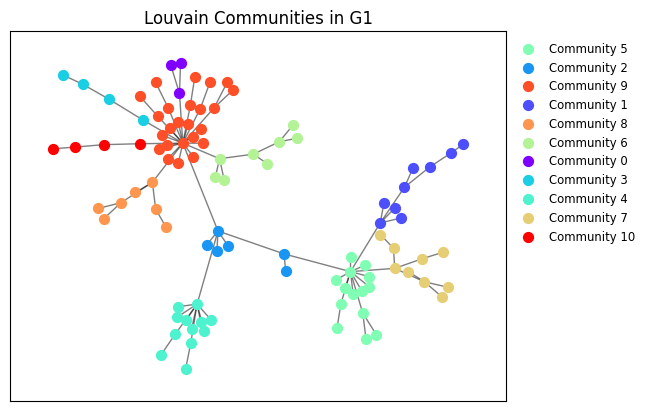

Graph G2
Community 2: {0, 2, 3, 13, 14, 16, 18, 19, 20, 23, 24, 32, 38, 42, 49, 68, 69, 72, 79, 87, 89, 90, 91, 94, 99}
Community 1: {1, 33, 35, 66, 97, 39, 73, 10, 46, 78, 48, 17, 86, 57, 26, 93, 95}
Community 4: {64, 4, 37, 7, 8, 41, 74, 43, 45, 80, 51, 85, 25, 62, 63}
Community 0: {96, 36, 5, 70, 9, 11, 76, 15, 53, 22, 88, 27, 92, 30}
Community 6: {65, 34, 6, 40, 77, 50, 82, 52, 21, 58, 28, 61}
Community 5: {56, 12, 44, 55}
Community 3: {98, 67, 71, 75, 47, 81, 83, 84, 54, 59, 60, 29, 31}



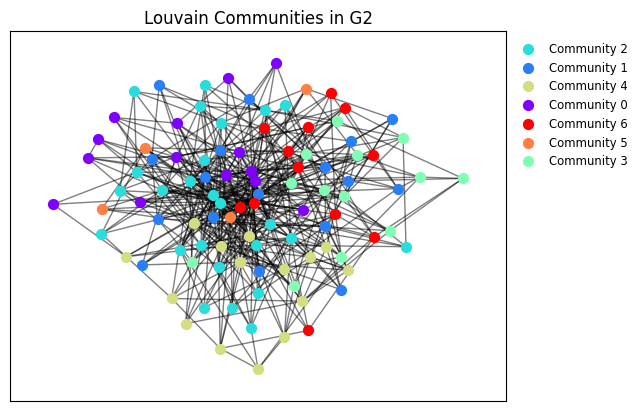

Graph G3
Community 5: {0, 68, 39, 71, 42, 11, 44, 48, 17, 18, 84, 54, 25, 90, 62}
Community 4: {1, 34, 67, 81, 50, 83, 55, 88, 94, 26, 92, 30}
Community 6: {2, 7, 13, 15, 23, 27, 37, 52, 56, 57, 59, 65, 69, 74, 75, 80, 82, 85, 89, 91, 98}
Community 1: {64, 3, 73, 14, 49, 51, 63}
Community 0: {96, 66, 4, 6, 38, 70, 9, 43, 76, 77, 19, 86, 87, 60, 29, 95, 31}
Community 2: {32, 33, 97, 35, 36, 5, 10, 45, 46, 78, 79, 20, 24, 58, 28}
Community 3: {99, 8, 40, 41, 72, 12, 47, 16, 93, 21, 22, 53, 61}



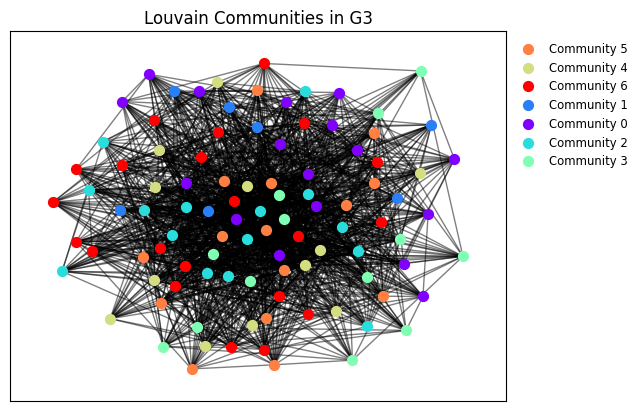

Graph G4
Community 2: {0, 4, 5, 13, 15, 17, 18, 21, 22, 24, 25, 26, 31, 33, 34, 37, 39, 41, 44, 46, 47, 53, 55, 56, 60, 65, 68, 70, 71, 72, 79, 80, 81, 83, 91, 92, 94, 95, 98}
Community 1: {1, 2, 3, 7, 9, 10, 11, 12, 28, 29, 30, 32, 36, 40, 45, 48, 49, 50, 51, 54, 57, 59, 61, 62, 63, 69, 73, 74, 75, 78, 82, 86, 87, 88, 93, 97, 99}
Community 0: {6, 8, 14, 16, 19, 20, 23, 27, 35, 38, 42, 43, 52, 58, 64, 66, 67, 76, 77, 84, 85, 89, 90, 96}



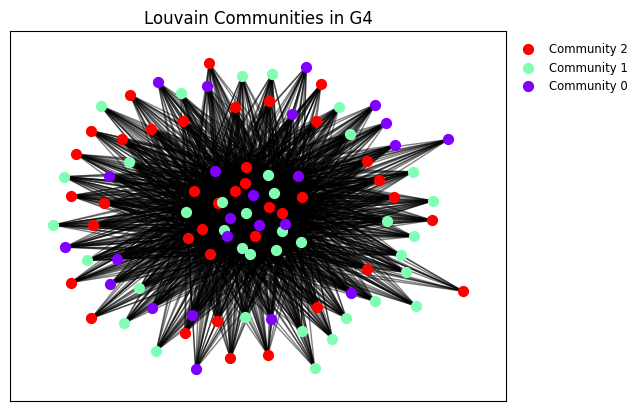

Graph G5
Community 0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}



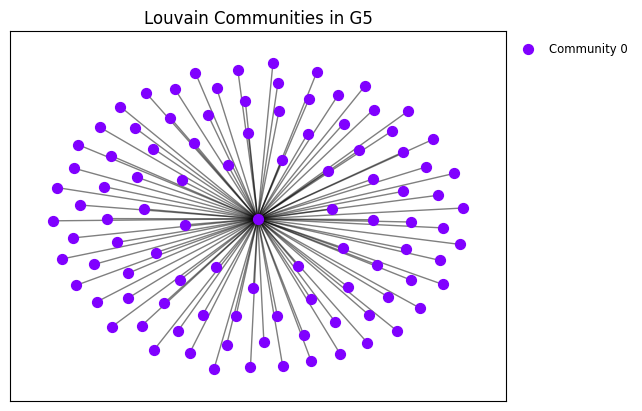

In [ ]:
for graph, name in zip(graphs, graph_names):
    partition = community_louvain.best_partition(graph, weight='weight')

    communities = {}

    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)
    print(f"Graph {name}")
    for community, nodes in communities.items():
        print(f"Community {community}: {set(nodes)}")
    print()

    cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
    pos = nx.spring_layout(graph)

    for community, nodes in communities.items():
        nx.draw_networkx_nodes(
            graph, pos, nodelist=nodes,
            node_size=50,
            node_color=[cmap(community)],
            label=f"Community {community}"
        )
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title(f"Louvain Communities in {name}")
    plt.legend(loc='upper left', fontsize='small', frameon=False, bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
import matplotlib.cm as cm
cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)

pos = nx.spring_layout(graph)
plt.figure(figsize=(8, 8))

for graph, name in zip(graphs, graph_names):
    partition = community_louvain.best_partition(graph, weight='weight')

    # Prikupite zajednice
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)



<ipython-input-14-acf3bf56ea9a>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)


<Figure size 800x800 with 0 Axes>

# Phase 3: Real-World Data Application

## Task 3.1: Comparison with Real-World Networks

In [ ]:
# import gzip
# import networkx as nx

# file_path = '/content/facebook_combined.txt.gz'

# with gzip.open(file_path, 'rt') as f:
#     F = nx.read_edgelist(f, nodetype=int)

In [ ]:
#os.chdir("E:\\Downloads")

#print(os.getcwd())

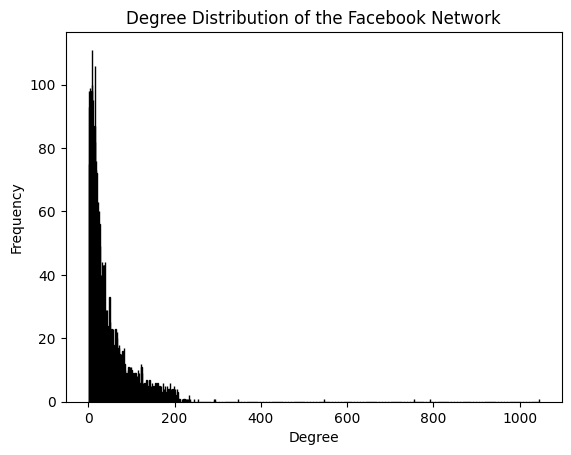

In [ ]:
F = nx.read_edgelist('facebook_combined.txt.gz', nodetype=int)
# edges: 88234, nodes: 4039
degree_hist = nx.degree_histogram(F)
plt.bar(range(len(degree_hist)), degree_hist, color='#D11F99', edgecolor='black')
#plt.xlim(0,300)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the Facebook Network")
plt.show()

In [ ]:
average_degree = sum(dict(F.degree()).values()) / len(F)
print("Average degree:", average_degree) # ovde smo dobili 44 sto nam je sluzilo kao m za nas model

Average degree: 43.69101262688784


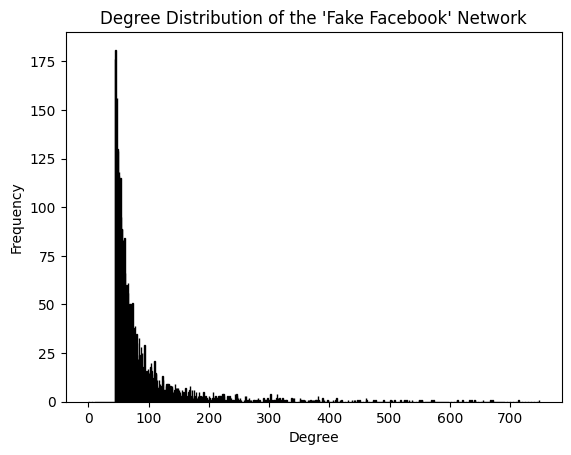

In [ ]:
# Our model that mimics this one:
n = 4039
m= 44
FF = nx.barabasi_albert_graph(n, m)

degree_hist = nx.degree_histogram(FF)
plt.bar(range(len(degree_hist)), degree_hist, color='#D11F99', edgecolor='black')
#plt.xlim(0,300)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the 'Fake Facebook' Network")
plt.show()


In [ ]:
# Metric Comparison: clustering coefficients and avg path len

print("F graph:")
global_clustering_coefficient = nx.transitivity(F)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")

average_clustering_coefficient = nx.average_clustering(F)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

average_path_length = nx.average_shortest_path_length(F)
print(f"Average Path Length: {average_path_length}")

# _____________________________________________________

print()
print("FF graph (ours):")

global_clustering_coefficient = nx.transitivity(FF)
print(f"Global Clustering Coefficient: {global_clustering_coefficient}")

average_clustering_coefficient = nx.average_clustering(FF)
print(f"Average Clustering Coefficient: {average_clustering_coefficient}")

average_path_length = nx.average_shortest_path_length(FF)
print(f"Average Path Length: {average_path_length}")


F graph:
Global Clustering Coefficient: 0.5191742775433075
Average Clustering Coefficient: 0.6055467186200876
Average Path Length: 3.6925068496963913

FF graph (ours):
Global Clustering Coefficient: 0.061160696634186267
Average Clustering Coefficient: 0.061597581531090455
Average Path Length: 2.131447215797534


In [ ]:
# Metric Comparison: degree centrality

print("F graph:")
degree = nx.degree_centrality(F)
print(f"Degree centrality:", sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5])

# ______________________________________________________

print()
print("FF graph:")
degree = nx.degree_centrality(FF)
print(f"Degree centrality:", sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5])

F graph:
Degree centrality: [(107, 0.258791480931154), (1684, 0.1961367013372957), (1912, 0.18697374938088163), (3437, 0.13546310054482416), (0, 0.08593363051015354)]

FF graph:
Degree centrality: [(0, 0.18524021792966813), (53, 0.17682020802377413), (54, 0.16617137196631995), (52, 0.1654284299157999), (46, 0.1622090143635463)]


In [ ]:
# Metric Comparison: Degree Assortativity Coefficient (asortativnost)
# Mera koja kvantifikuje da li čvorovi sa visokim stepenom (mnogim vezama) preferiraju povezivanje sa drugim čvorovima visokog stepena.
print("F:", nx.degree_assortativity_coefficient(F))
print("FF:", nx.degree_assortativity_coefficient(FF))

F: 0.06357722918564943
FF: -0.002209484505687759


Graph F



<ipython-input-25-2be7808844dd>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)


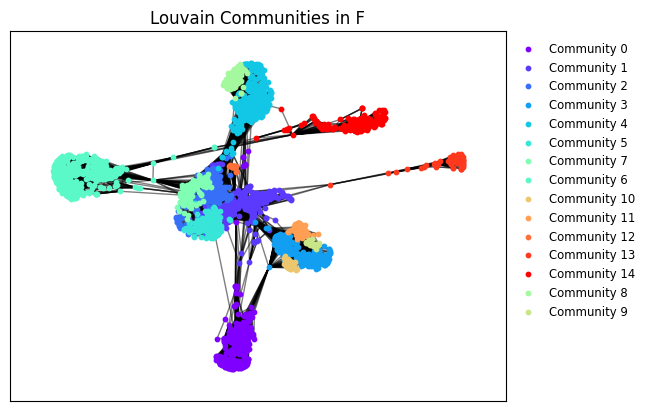

Graph FF



<ipython-input-25-2be7808844dd>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)


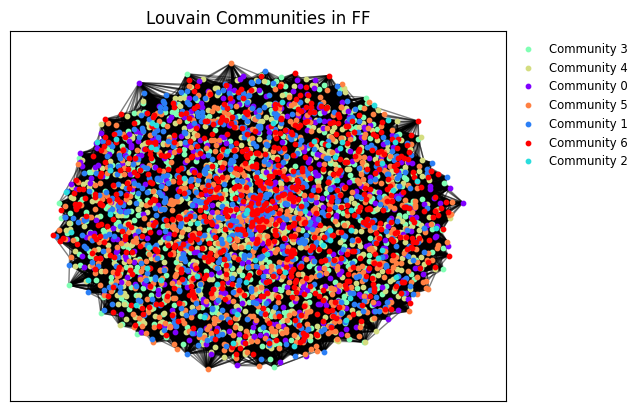

In [ ]:
# Communities: Louvain algorithm
graphs1=[F,FF]
graph_names1=['F','FF']
for graph, name in zip(graphs1, graph_names1):
    partition = community_louvain.best_partition(graph, weight='weight')

    communities = {}

    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)
    print(f"Graph {name}")
    #for community, nodes in communities.items():
    #    print(f"Community {community}: {set(nodes)}")
    print()

    cmap = cm.get_cmap('rainbow', max(partition.values()) + 1)
    pos = nx.spring_layout(graph)

    for community, nodes in communities.items():
        nx.draw_networkx_nodes(
            graph, pos, nodelist=nodes,
            node_size=10,
            node_color=[cmap(community)],
            label=f"Community {community}"
        )
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title(f"Louvain Communities in {name}")
    plt.legend(loc='upper left', fontsize='small', frameon=False, bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Metric Comparison: Diameter
print("F:", nx.diameter(F)) #
print("FF:", nx.diameter(FF)) #

F: 8
FF: 3


In [ ]:
print("F:", nx.density(F))
print("F:", nx.density(FF))

F: 0.010819963503439287
F: 0.021555558907388965


# Phase 4: Advanced Analysis

## Task 4.1: Robustness Analysis

In [ ]:
# Simulating the removal of 5%, 10%, 20%, and 50% nodes and see what happens with the:
# size of the largest connected component, average shortest path len and density. (maybe some additional metric)
# targeted ce biti one sa najvecim stepenom povezanosti

def simulate_removals(G, percentages, removal_type="random", draw=False):
    original_size = G.number_of_nodes()
    lcc_sizes = []
    avg_paths = []
    densities = []

    for percent in percentages:
        # Pravi kopiju originalnog grafa
        G_copy = G.copy()

        num_to_remove = int(original_size * percent)
        if removal_type == "random":
            nodes_to_remove = random.sample(list(G_copy.nodes()), num_to_remove)
        elif removal_type == "targeted":
            # Target high-degree nodes
            nodes_to_remove = sorted(G_copy.degree, key=lambda x: x[1], reverse=True)[:num_to_remove]
            nodes_to_remove = [node for node, _ in nodes_to_remove]

        # Uklanja čvorove iz kopije grafa
        G_copy.remove_nodes_from(nodes_to_remove)

        # Procena najveće povezane komponente (LCC)
        lcc_size = len(max(nx.connected_components(G_copy), key=len)) if nx.number_connected_components(G_copy) > 0 else 0
        lcc_sizes.append(lcc_size)

        # Prosečna dužina najkraćih puteva
        G_lcc = G_copy.subgraph(max(nx.connected_components(G_copy), key=len)) if lcc_size > 0 else None
        avg_path_length = nx.average_shortest_path_length(G_lcc) if G_lcc else None
        avg_paths.append(avg_path_length)

        # Gustina grafa
        densities.append(nx.density(G_copy))

        # Nacrtaj graf samo ako je parametar 'draw' True
        # if draw:
        #     plt.figure(figsize=(8, 6))
        #     nx.draw(G_copy, with_labels=True, node_size=50, font_size=8)
        #     plt.title(f"Graph after removing {int(percent * 100)}% of nodes")
        #     plt.show()

    return lcc_sizes, avg_paths, densities

def plot_metrics(percentages, metric_values, metric_name, removal_type):
    plt.plot(percentages, metric_values,marker='o', label=f'{removal_type} removal')
    plt.xlabel("Percentage of Nodes Removed")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} vs Node Removals")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Testing on G2 for random:
print("original lcc size:", len(max(nx.connected_components(G2), key=len)))
print("original avg_path_length:", nx.average_shortest_path_length(G2))
print("original density:", nx.density(G2))

random_removal = simulate_removals(G2, [0.05, 0.1, 0.2, 0.5], removal_type="random", draw=True)
targeted_removal = simulate_removals(G2, [0.05, 0.1, 0.2, 0.5], removal_type="targeted", draw=True)
print('Random:', random_removal)
print()
print('Targeted', targeted_removal)

original lcc size: 100
original avg_path_length: 2.2365656565656566
original density: 0.09595959595959595
Random: ([95, 90, 80, 50], [2.2884658454647258, 2.245443196004994, 2.336392405063291, 2.837551020408163], [0.09204927211646137, 0.10037453183520599, 0.09335443037974683, 0.08])

Targeted ([95, 90, 80, 26], [2.4980963045912654, 2.7470661672908863, 3.319620253164557, 5.323076923076923], [0.07346024636058231, 0.062421972534332085, 0.049367088607594936, 0.024489795918367346])


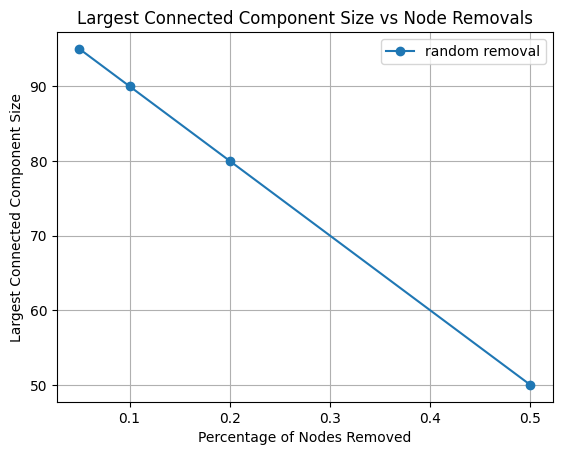

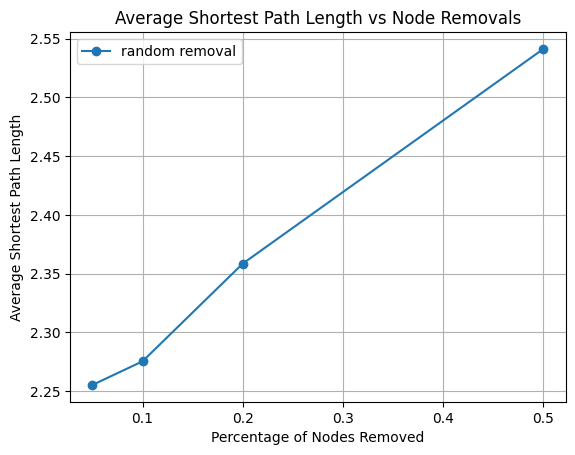

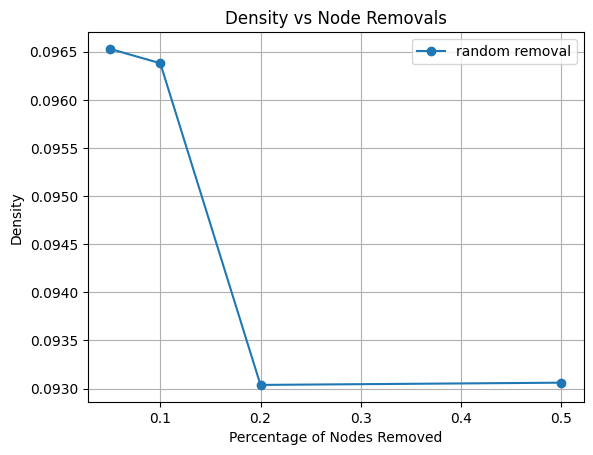

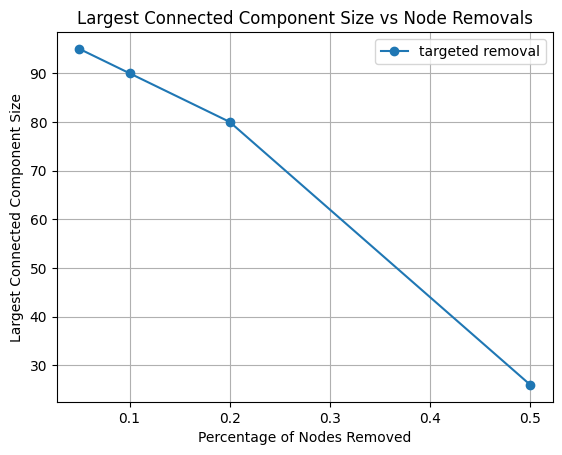

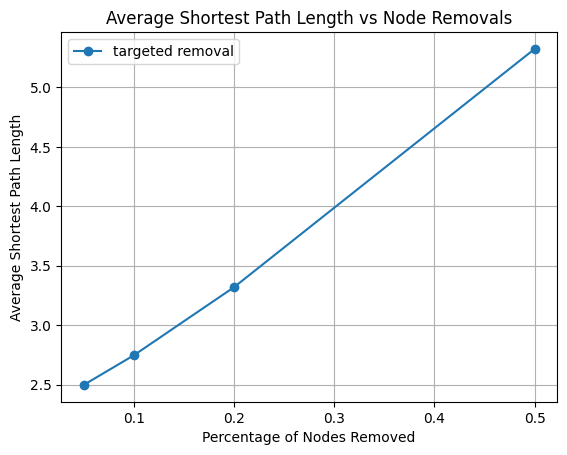

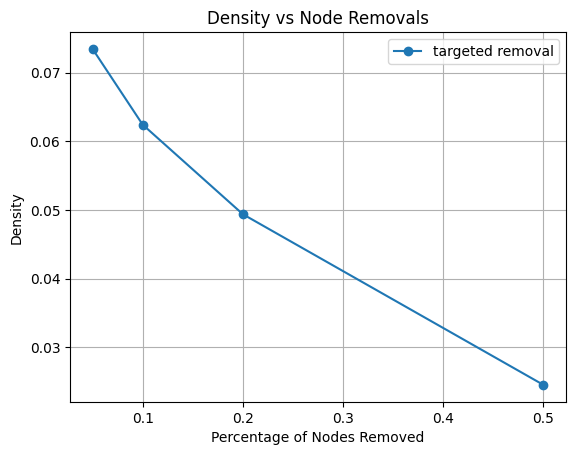

In [ ]:
# Function that shows the changing of metrices with increasing the number of removed nodes.
percentages = [0.05, 0.1, 0.2, 0.5]

for removal_type in ["random", "targeted"]:
    lcc_sizes, avg_paths, densities = simulate_removals(G2.copy(), percentages, removal_type)

    plot_metrics(percentages, lcc_sizes, "Largest Connected Component Size", removal_type)
    plot_metrics(percentages, avg_paths, "Average Shortest Path Length", removal_type)
    plot_metrics(percentages, densities, "Density", removal_type)

## Task 4.2: Calculating features for different parameters

In [ ]:
# Function to calculate the features
def calculate_features(G):
    diameter = nx.diameter(G)
    avg_clustering = nx.average_clustering(G)
    avg_path_length = nx.average_shortest_path_length(G) if nx.is_connected(G) else np.nan
    return diameter, avg_clustering, avg_path_length

In [ ]:
# Parameters for exploration
m_values = [1, 5, 20, 50, 80, 90, 98, 99]
N_values = [10, 100, 500, 1000, 2000]

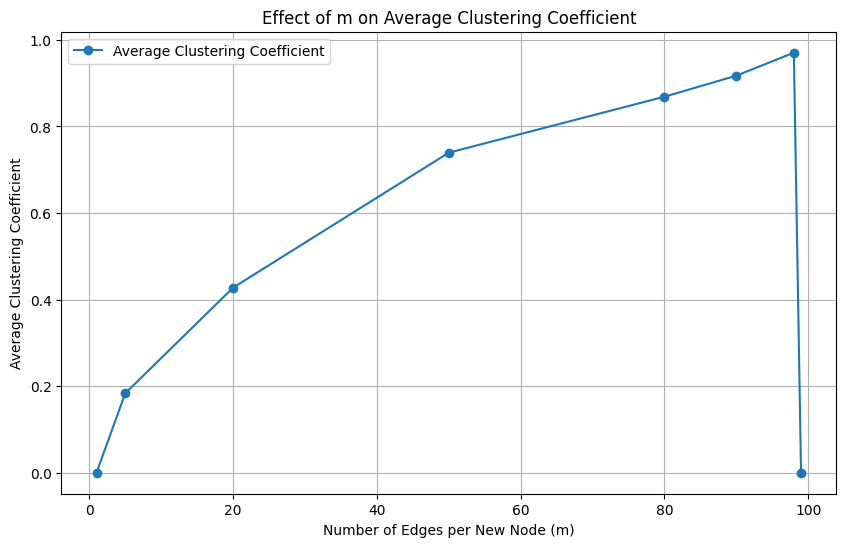

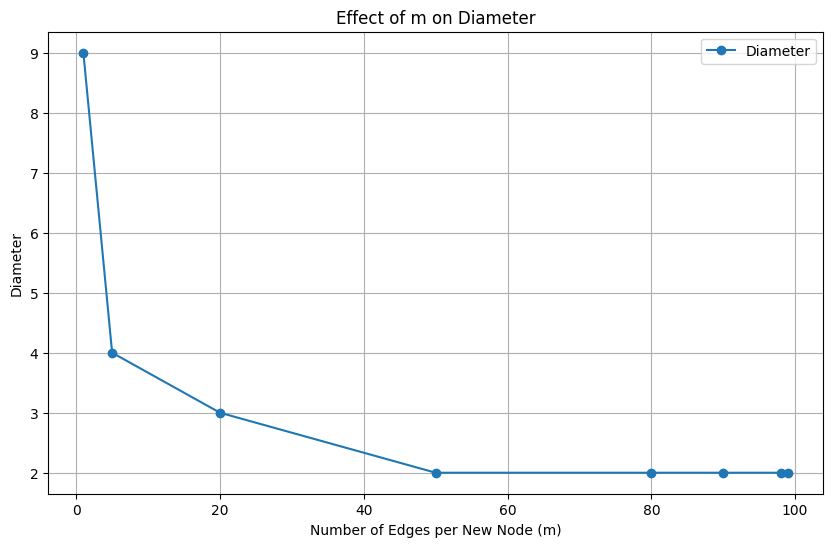

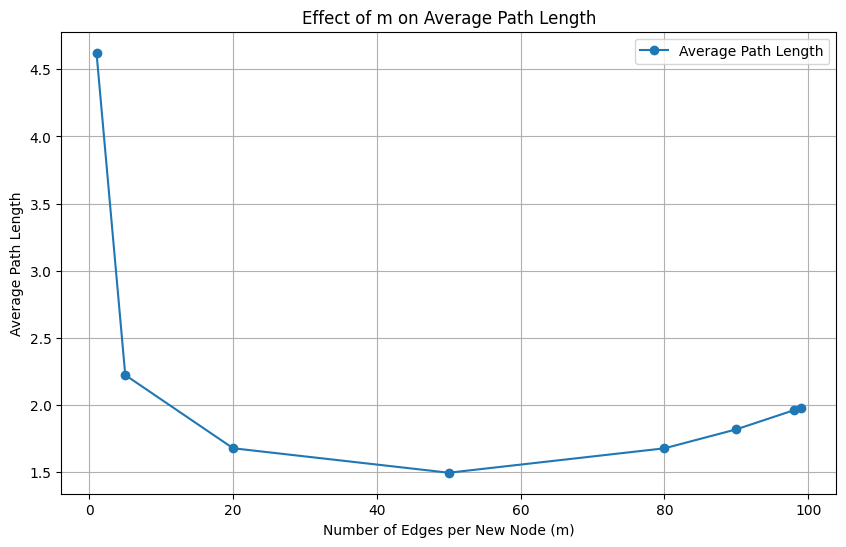

In [ ]:
# Changing m:
diameter1 = []
clustering_coeffs = []
path_lengths = []

for m in m_values:
    G = nx.barabasi_albert_graph(100, m)
    diameter, avg_clustering, avg_path_length = calculate_features(G)
    diameter1.append(diameter)
    clustering_coeffs.append(avg_clustering)
    path_lengths.append(avg_path_length)

plt.figure(figsize=(10, 6))
plt.plot(m_values, clustering_coeffs, marker='o', label='Average Clustering Coefficient')
plt.xlabel('Number of Edges per New Node (m)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Effect of m on Average Clustering Coefficient')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(m_values, diameter1, marker='o', label='Diameter')
plt.xlabel('Number of Edges per New Node (m)')
plt.ylabel('Diameter')
plt.title('Effect of m on Diameter')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(m_values, path_lengths, marker='o', label='Average Path Length')
plt.xlabel('Number of Edges per New Node (m)')
plt.ylabel('Average Path Length')
plt.title('Effect of m on Average Path Length')
plt.grid(True)
plt.legend()
plt.show()


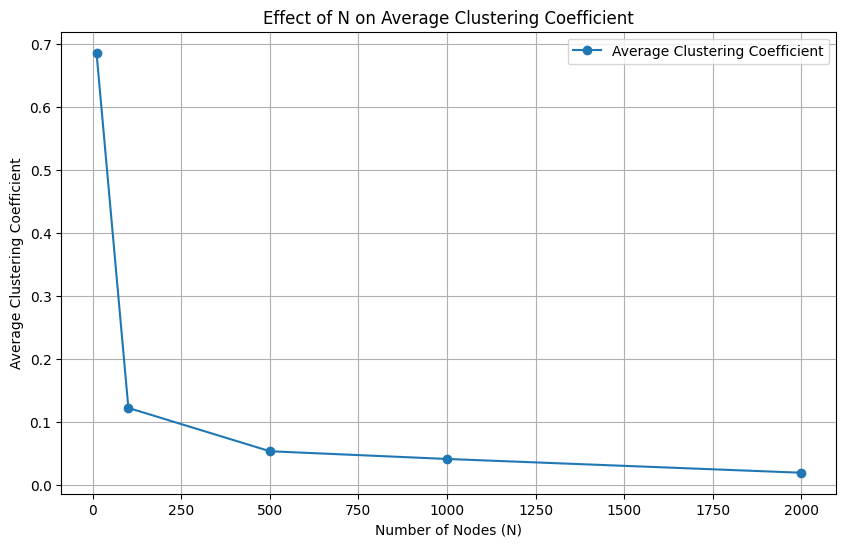

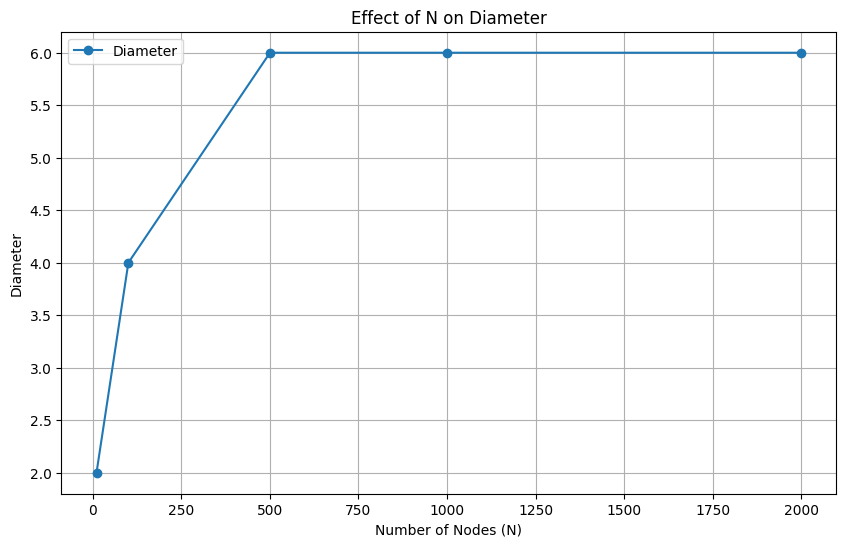

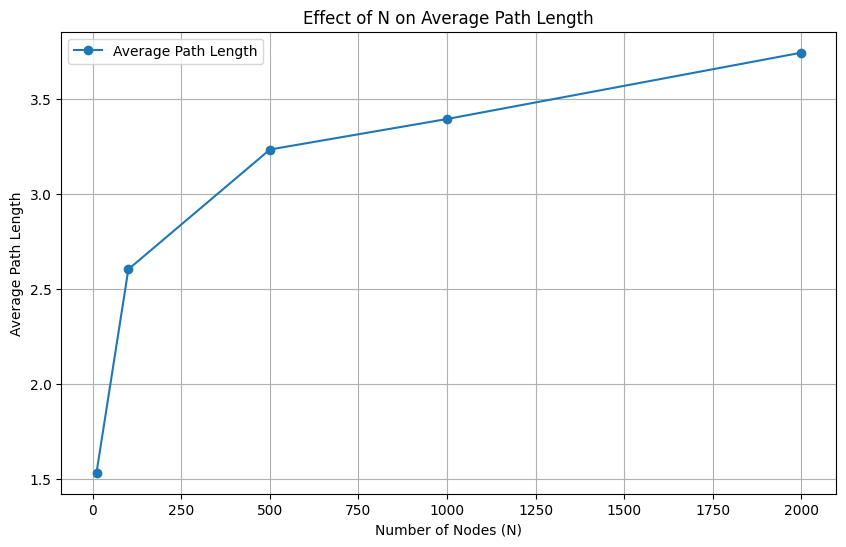

In [ ]:
# Changing n:
diameter1 = []
clustering_coeffs = []
path_lengths = []

for N in N_values:
    G = nx.barabasi_albert_graph(N, 3)
    diameter, avg_clustering, avg_path_length = calculate_features(G)
    diameter1.append(diameter)
    clustering_coeffs.append(avg_clustering)
    path_lengths.append(avg_path_length)

plt.figure(figsize=(10, 6))
plt.plot(N_values, clustering_coeffs, marker='o', label='Average Clustering Coefficient')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Average Clustering Coefficient')
plt.title('Effect of N on Average Clustering Coefficient')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(N_values, diameter1, marker='o', label='Diameter')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Diameter')
plt.title('Effect of N on Diameter')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(N_values, path_lengths, marker='o', label='Average Path Length')
plt.xlabel('Number of Nodes (N)')
plt.ylabel('Average Path Length')
plt.title('Effect of N on Average Path Length')
plt.grid(True)
plt.legend()
plt.show()